# Housing Prices in Cyprus

This project is based on the exploration of Apartments and House prices across the Cypriot districts. With the use of a `Webscraper`, the data were harvested from a Cypriot website that contains listings from multiple Developer websites across all Cyprus. The data harvested from the Webscraper are stored into two excel files based on the two property types of 'Apartments' and 'Houses'. The data are pulled in November 2022 based on current houses and apartments which were being sold at the time.  

**The Analysis Goal** is to investigate and find the average price per property type based on the number of bedrooms and District.

**Comment:** There are hashtags with explanations on what the code does above each line.

**Disclaimer** The data pulled are used only for scientific research purposes and coding skills that I want to develop. The data are not redistributed in any other way.  

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reads the excell file into a dataframe 
Apartments = pd.read_csv (r'C:\Users\ASpyrou\PycharmProjects\pythonProject\pythonProject\vamos\vamosela\vamosela\apartments.csv' )
Houses = pd.read_csv (r'C:\Users\ASpyrou\PycharmProjects\pythonProject\pythonProject\vamos\vamosela\vamosela\houses.csv' )

---
## Datasets information

Below we can see examples from the data that are based on Apartments and Houses datasets. The Webscraper was used to retrieve the following information: 
- Title (This is the listing title from the website)
- Location (The property location which consists the district and the area)
- Price (The property price)
- Currency (The price currency)
- Discription (The discription of the property)


In [3]:
#Printing the first 10 rows of the dataframe
Apartments.head(10)

,Title,Location,Price,Currency,Description
0,1-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Agios...",157300,EUR,For 1-bedroom apartment in a prime location in...
1,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia",255000,EUR,A well-maintained 2 bedroom apartment located ...
2,3-bedroom apartment fоr sаle,"Limassol district, Limassol - Mesa Geitonia",415000,EUR,Πωλείται διαμερίσμα 3 υπνοδωματίων στην Μέσα Γ...
3,2-bedroom apartment fоr sаle,"Paphos district, Paphos - Kato Paphos",350000,EUR,FOR SALE OR RENT - ESTATE AGENTS ARE WELCOME T...
4,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Apostolos Andreas",240000,EUR,✅ Modern Apartments & Penthouses with 2 & 3 be...
5,2-bedroom apartment fоr sаle,"Larnaca district, Aradippou - Apostolos Loukas",170000,EUR,2 & 3 bedroom apartments Modern design Energy ...
6,2-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Chrys...",152000,EUR,This beautiful apartment is available for sale...
7,2-bedroom apartment fоr sаle,"Limassol district, Mesa Geitonia",630000,EUR,RESALE. Currently rented.New spacious 2 bedroo...
8,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia Tourist Area",1300000,EUR,🔹 THE ICON 🔹Do you want to be the owner of one...
9,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Agia Zoni",320000,EUR,This stunning two bedroom apartment is nicely ...


In [4]:
Houses.head(10)

,Title,Location,Price,Currency,Description
0,3-bedroom detached house fоr sаle,"Limassol district, Potamos Germasogeias",650000,EUR,Available House in Kalogyrous perfect conditio...
1,3-bedroom villa fоr sаle,"Famagusta district, Kapparis",360000,EUR,"A 3-bedroom luxury seaview villa in Kapparis, ..."
2,4-bedroom villa fоr sаle,"Paphos district, Drouseia",300000,EUR,This Bungalow is situated in historic Village ...
3,4-bedroom detached house fоr sаle,"Famagusta district, Paralimni",230000,EUR,REFERENCE NUMBER: A46 – F1084 BEDROOM HOUSE IN...
4,4-bedroom detached house fоr sаle,"Larnaca district, Livadia Larnakas",470000,EUR,The house was built during 2008 on a plot of l...
5,4-bedroom villa fоr sаle,"Paphos district, Pomos",349000,EUR,"4-bedroom villa, in Pomos village, 535 sq m pl..."
6,3-bedroom villa fоr sаle,"Paphos district, Neo Chorio Pafou",1950000,EUR,"- Luxury villa in Neo Chorio Pafou, Pafos, for..."
7,3-bedroom detached house fоr sаle,"Limassol district, Moniatis",1350000,EUR,"• Located in Moniatis, Limassol - on the outsk..."
8,5-bedroom 5 fоr sаle,"Larnaca district, Perivolia Larnakas",2650000,EUR,"Luxurious, Beach Front Five Bedroom Detached H..."
9,2-bedroom detached house fоr sаle,"Larnaca district, Perivolia Larnakas",450000,EUR,"• Located in Pervolia, Larnaca- 200 metres awa..."


**Checking for Null values:** As it can be seen from the code below there are no null values across both datasets.    

In [5]:
#Checking for NaN values on Apartments dataframe
Apartments.isnull().sum()

Title          0
Location       0
Price          0
Currency       0
Description    0
dtype: int64

In [6]:
#Checking for NaN values on Houses dataframe
Houses.isnull().sum()

Title          0
Location       0
Price          0
Currency       0
Description    0
dtype: int64

**Dataset information**

In [7]:
#Examining Apartments Dataframe Information
Apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6949 entries, 0 to 6948
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6949 non-null   object
 1   Location     6949 non-null   object
 2   Price        6949 non-null   int64 
 3   Currency     6949 non-null   object
 4   Description  6949 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.6+ KB


In [8]:
#Examining Houses Dataframe Information
Houses.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Title        6240 non-null   bool 
 1   Location     6240 non-null   bool 
 2   Price        6240 non-null   bool 
 3   Currency     6240 non-null   bool 
 4   Description  6240 non-null   bool 
dtypes: bool(5)
memory usage: 30.6 KB


Below we can see an example of the datasets which consist of information on the various apartments and houses. Moreover we can see that we have 6949 Apartmets listings and 6240 Houses listings which makes a considerable amount for calculating averages.   

---
## Data Preparation

The part below is based on the extraction of information from the 'Title' and 'Location' fields, the information needed is the number of bedrooms from each title and the district and area from each location.

In [9]:
#Makes all capital case letters to lower case
Apartments['Title'] = Apartments['Title'].str.lower()
#--------------------------------------------------------------------------------------------------------
Houses['Title'] = Houses['Title'].str.lower()

In [10]:
#Concatenating all titles into a single string
Title_str = Apartments.Title.str.cat()
#--------------------------------------------------------------------------------------------------------
Title_str_H = Houses.Title.str.cat()

In [11]:
#Splitting the titles into words
Title_str1 = pd.DataFrame()
Title_str1['Word'] =Title_str.split()
#--------------------------------------------------------------------------------------------------------
Title_str2 = pd.DataFrame()
Title_str2['Word'] =Title_str_H.split()

So far we have converted all title letters to lower case and created two Dataframes that contain all words used in the titles as seen in the example provided below.   

In [12]:
Title_str1.head(10)

,Word
0,1-bedroom
1,apartment
2,fоr
3,sаle2-bedroom
4,apartment
5,fоr
6,sаle3-bedroom
7,apartment
8,fоr
9,sаle2-bedroom


Now we will count how many times each word appears across all titles.

In [13]:
#Creating a New Dataframe that shows the count of each word in the title and sorting them by highest first
Title_Wordcount = Title_str1.groupby(['Word']).size().reset_index(name="Word Count").sort_values(["Word Count"],ascending=[False])
#--------------------------------------------------------------------------------------------------------
Title_Wordcount_H = Title_str2.groupby(['Word']).size().reset_index(name="Word Count").sort_values(["Word Count"],ascending=[False])

Below we can see the most common words used in the titles of the Apartments dataset. From here we can see that most of the listings are between 2 and 3 bedrooms, 3559 and 2207 respectively.

In [14]:
#Printing the word count in a descenting order and reseting the index
Title_Wordcount.sort_values(["Word Count"],ascending=[False]).reset_index(drop=True)

,Word,Word Count
0,fоr,6949
1,apartment,6069
2,sаle2-bedroom,3558
3,sаle3-bedroom,2207
4,penthouse,871
5,sаle1-bedroom,868
6,sаle4-bedroom,229
7,sаlestudio,59
8,sаle5-bedroom,18
9,flat,9


Below we can see the most common words used in the titles of the Houses dataset. From here we can see that most of the listings are between 3 and 4 bedrooms, 2981 and 1785 respectively.

In [15]:
Title_Wordcount_H.sort_values(["Word Count"],ascending=[False]).reset_index(drop=True)

,Word,Word Count
0,fоr,6240
1,detached,3636
2,house,3636
3,sаle3-bedroom,2979
4,villa,1920
5,sаle4-bedroom,1785
6,sаle5-bedroom,640
7,sаle2-bedroom,520
8,semi-detached,417
9,maisonette,172


Based on the above breakdowns we also discover that we are able to extract the number of bedrooms from each title and store them in a new column. An example of the data in the new column named 'Bedrooms_No' is shown in the examples below.

In [16]:
#Creating a loop that identifies the number of bedrooms in the title
for n in map(str,list(range(1, 11))):
    Apartments.loc[(Apartments['Title'].str.contains(n)) , 'Bedrooms_No'] = n+'-bedroom'
#--------------------------------------------------------------------------------------------------------    
for n in map(str,list(range(1, 11))):
    Houses.loc[(Houses['Title'].str.contains(n)) , 'Bedrooms_No'] = n+'-bedroom'    

In [17]:
Apartments.head(10)

,Title,Location,Price,Currency,Description,Bedrooms_No
0,1-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Agios...",157300,EUR,For 1-bedroom apartment in a prime location in...,1-bedroom
1,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia",255000,EUR,A well-maintained 2 bedroom apartment located ...,2-bedroom
2,3-bedroom apartment fоr sаle,"Limassol district, Limassol - Mesa Geitonia",415000,EUR,Πωλείται διαμερίσμα 3 υπνοδωματίων στην Μέσα Γ...,3-bedroom
3,2-bedroom apartment fоr sаle,"Paphos district, Paphos - Kato Paphos",350000,EUR,FOR SALE OR RENT - ESTATE AGENTS ARE WELCOME T...,2-bedroom
4,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Apostolos Andreas",240000,EUR,✅ Modern Apartments & Penthouses with 2 & 3 be...,2-bedroom
5,2-bedroom apartment fоr sаle,"Larnaca district, Aradippou - Apostolos Loukas",170000,EUR,2 & 3 bedroom apartments Modern design Energy ...,2-bedroom
6,2-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Chrys...",152000,EUR,This beautiful apartment is available for sale...,2-bedroom
7,2-bedroom apartment fоr sаle,"Limassol district, Mesa Geitonia",630000,EUR,RESALE. Currently rented.New spacious 2 bedroo...,2-bedroom
8,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia Tourist Area",1300000,EUR,🔹 THE ICON 🔹Do you want to be the owner of one...,2-bedroom
9,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Agia Zoni",320000,EUR,This stunning two bedroom apartment is nicely ...,2-bedroom


In [18]:
Houses.head(10)

,Title,Location,Price,Currency,Description,Bedrooms_No
0,3-bedroom detached house fоr sаle,"Limassol district, Potamos Germasogeias",650000,EUR,Available House in Kalogyrous perfect conditio...,3-bedroom
1,3-bedroom villa fоr sаle,"Famagusta district, Kapparis",360000,EUR,"A 3-bedroom luxury seaview villa in Kapparis, ...",3-bedroom
2,4-bedroom villa fоr sаle,"Paphos district, Drouseia",300000,EUR,This Bungalow is situated in historic Village ...,4-bedroom
3,4-bedroom detached house fоr sаle,"Famagusta district, Paralimni",230000,EUR,REFERENCE NUMBER: A46 – F1084 BEDROOM HOUSE IN...,4-bedroom
4,4-bedroom detached house fоr sаle,"Larnaca district, Livadia Larnakas",470000,EUR,The house was built during 2008 on a plot of l...,4-bedroom
5,4-bedroom villa fоr sаle,"Paphos district, Pomos",349000,EUR,"4-bedroom villa, in Pomos village, 535 sq m pl...",4-bedroom
6,3-bedroom villa fоr sаle,"Paphos district, Neo Chorio Pafou",1950000,EUR,"- Luxury villa in Neo Chorio Pafou, Pafos, for...",3-bedroom
7,3-bedroom detached house fоr sаle,"Limassol district, Moniatis",1350000,EUR,"• Located in Moniatis, Limassol - on the outsk...",3-bedroom
8,5-bedroom 5 fоr sаle,"Larnaca district, Perivolia Larnakas",2650000,EUR,"Luxurious, Beach Front Five Bedroom Detached H...",5-bedroom
9,2-bedroom detached house fоr sаle,"Larnaca district, Perivolia Larnakas",450000,EUR,"• Located in Pervolia, Larnaca- 200 metres awa...",2-bedroom


Now lets check for Null values.

In [19]:
#Checking for null values
Apartments['Bedrooms_No'] .isnull().sum()

59

In [20]:
#Checking for null values
Houses['Bedrooms_No'] .isnull().sum()

18

Checking for null values in our newly created field we see that we have 59 in Apartments and 18 in Houses. We will create two new dataframes which have NULL in the field "bedrooms_No" and then use print so we can observe and find what causes the Null values. 

In [21]:
#Creating a dataframe based on null values of Bedrooms No
ApNullVals = Apartments.loc[Apartments['Bedrooms_No'] .isnull()]
#--------------------------------------------------------------------------------------------------------
HouNullVals = Houses.loc[Houses['Bedrooms_No'] .isnull()]

In [22]:
#Ptinting all the records from the dataset
ApNullVals

,Title,Location,Price,Currency,Description,Bedrooms_No
57,studio apartment fоr sаle,Lefkosia (Nicosia) district,99000,EUR,Studio apartment fоr sаle!! Πωλείται στούντιο ...,NaN
60,studio apartment fоr sаle,Lefkosia (Nicosia) district,97000,EUR,Studio apartment fоr sаle!! Πωλείται στούντιο ...,NaN
166,studio apartment fоr sаle,"Lefkosia (Nicosia) district, Lakatameia - Agia...",113000,EUR,El Mundo Real Estate Ltd is happy to present t...,NaN
512,studio apartment fоr sаle,"Limassol district, Potamos Germasogeias",123000,EUR,Studio apartment at Potamos Germasogeias on a ...,NaN
673,studio apartment fоr sаle,"Limassol district, Germasogeia",422000,EUR,Ultra-modern development located within the so...,NaN
1125,studio apartment fоr sаle,"Limassol district, Limassol - Neapolis",135000,EUR,For sale is a small studio in the heart of Lim...,NaN
1131,studio apartment fоr sаle,"Paphos district, Paphos - Kato Paphos",160000,EUR,COMPLEX OF 20 APARTMENTS WITH POOL FOR SALE IN...,NaN
1177,studio apartment fоr sаle,"Limassol district, Agios Athanasios",336000,EUR,"Studio apartment for sale in Agios Athanasios,...",NaN
1588,studio apartment fоr sаle,"Limassol district, Limassol - Neapolis",135000,EUR,For sale is a small studio in the heart of Lim...,NaN
1621,studio apartment fоr sаle,"Larnaca district, Larnaka - Makenzy",89500,EUR,"Fully renovated, 4th floor, studio apartment f...",NaN


In [23]:
HouNullVals

,Title,Location,Price,Currency,Description,Bedrooms_No
11,studio semi-detached fоr sаle,"Lefkosia (Nicosia) district, Agios Dometios - ...",78000,EUR,This property will be sold through our digital...,NaN
857,studio villa fоr sаle,"Limassol district, Agios Tychon",3800000,EUR,For sale under construction 3-storey villa of ...,NaN
1653,studio detached house fоr sаle,"Limassol district, Platanisteia",600000,EUR,"3-bedroom bungalow for sale, 150m from blue fl...",NaN
2206,studio detached house fоr sаle,"Lefkosia (Nicosia) district, Lakatameia - Agio...",530000,EUR,The asset is a three-floor detached house in C...,NaN
2666,studio villa fоr sаle,"Limassol district, Asgata",360000,EUR,A beautiful house in Asgata village featured o...,NaN
3031,studio detached house fоr sаle,"Limassol district, Limassol - Agios Nicolaos",22000,EUR,House on wells,NaN
5128,studio villa fоr sаle,"Lefkosia (Nicosia) district, Lakatameia - Agio...",290000,EUR,"Γκαρσονιέρα στούντιο με συσκευές, ανεξάρτητο, ...",NaN
5149,studio villa fоr sаle,"Limassol district, Kolossi -Agios Loukas",1250000,EUR,.,NaN
5556,studio semi-detached fоr sаle,"Limassol district, Agios Therapon",95000,EUR,Plot of land with 1 large room small house in ...,NaN
5725,studio villa fоr sаle,"Paphos district, Mesogi",340000,EUR,For sale under construction villa of 132 sq.me...,NaN


As we can see from the Title column, the word "studio" is shown instead of a number combined with the word "bedroom". This is what's responsible for the Null value. To be sure lets create another field called 'Studio' that will show "Yes" or "No" depending on the word "studio" appearing in the title, then we will count the 'Yes' and see if all titles contain the word "studio".   

In [24]:
#Creating a column to identify if there is the word "Studio" in the title
ApNullVals.loc[(ApNullVals['Title'].str.contains('studio')), 'Studio'] ="Yes"  

In [25]:
HouNullVals.loc[(HouNullVals['Title'].str.contains('studio')) , 'Studio'] ="Yes"  

In [26]:
#Showing the number of listings that have Null in Bedrooms_No and Yes or No if they contain the word "Studio" 
ApNullVals.groupby(['Studio']).size()

Studio
Yes    59
dtype: int64

In [27]:
#Showing the number of listings that have Null in Bedrooms_No and Yes or No if they contain the word "Studio" 
HouNullVals.groupby(['Studio']).size()

Studio
Yes    18
dtype: int64

After testing our theory, we can see that both datasets have the word "studio" in the column 'Title' and "Null" in the column 'Bedroom_no'. Therefore we will treat these entities as 1 bedroom listings and replace all Nulls in the column 'Bedrooms_No' with the word "1-bedroom".  

In [28]:
#Replacing nan values of Bedrooms_No with 1 these are the studions
Apartments['Bedrooms_No'] = Apartments['Bedrooms_No'].fillna('1-bedroom') .astype(str) 
#--------------------------------------------------------------------------------------------------------   
Houses['Bedrooms_No'] = Houses['Bedrooms_No'].fillna('1-bedroom') .astype(str) 

Now we need to extract the 'District' and 'Area' information from the 'Location' field and store them in two separate columns.

In [29]:
#Splitting the Location into District and Area
Apartments[['District','Area']]=Apartments['Location'].str.split(',', expand = True)
#--------------------------------------------------------------------------------------------------------
Houses[['District','Area']]=Houses['Location'].str.split(',', expand = True)

Finally our Dataframes will consist of 8 fields as seen in the examples printed below.

In [30]:
Apartments.head(10)

,Title,Location,Price,Currency,Description,Bedrooms_No,District,Area
0,1-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Agios...",157300,EUR,For 1-bedroom apartment in a prime location in...,1-bedroom,Lefkosia (Nicosia) district,Strovolos - Agios Vasileios
1,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia",255000,EUR,A well-maintained 2 bedroom apartment located ...,2-bedroom,Limassol district,Germasogeia
2,3-bedroom apartment fоr sаle,"Limassol district, Limassol - Mesa Geitonia",415000,EUR,Πωλείται διαμερίσμα 3 υπνοδωματίων στην Μέσα Γ...,3-bedroom,Limassol district,Limassol - Mesa Geitonia
3,2-bedroom apartment fоr sаle,"Paphos district, Paphos - Kato Paphos",350000,EUR,FOR SALE OR RENT - ESTATE AGENTS ARE WELCOME T...,2-bedroom,Paphos district,Paphos - Kato Paphos
4,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Apostolos Andreas",240000,EUR,✅ Modern Apartments & Penthouses with 2 & 3 be...,2-bedroom,Limassol district,Limassol - Apostolos Andreas
5,2-bedroom apartment fоr sаle,"Larnaca district, Aradippou - Apostolos Loukas",170000,EUR,2 & 3 bedroom apartments Modern design Energy ...,2-bedroom,Larnaca district,Aradippou - Apostolos Loukas
6,2-bedroom apartment fоr sаle,"Lefkosia (Nicosia) district, Strovolos - Chrys...",152000,EUR,This beautiful apartment is available for sale...,2-bedroom,Lefkosia (Nicosia) district,Strovolos - Chryseleousa
7,2-bedroom apartment fоr sаle,"Limassol district, Mesa Geitonia",630000,EUR,RESALE. Currently rented.New spacious 2 bedroo...,2-bedroom,Limassol district,Mesa Geitonia
8,2-bedroom apartment fоr sаle,"Limassol district, Germasogeia Tourist Area",1300000,EUR,🔹 THE ICON 🔹Do you want to be the owner of one...,2-bedroom,Limassol district,Germasogeia Tourist Area
9,2-bedroom apartment fоr sаle,"Limassol district, Limassol - Agia Zoni",320000,EUR,This stunning two bedroom apartment is nicely ...,2-bedroom,Limassol district,Limassol - Agia Zoni


In [31]:
Houses.head(10)

,Title,Location,Price,Currency,Description,Bedrooms_No,District,Area
0,3-bedroom detached house fоr sаle,"Limassol district, Potamos Germasogeias",650000,EUR,Available House in Kalogyrous perfect conditio...,3-bedroom,Limassol district,Potamos Germasogeias
1,3-bedroom villa fоr sаle,"Famagusta district, Kapparis",360000,EUR,"A 3-bedroom luxury seaview villa in Kapparis, ...",3-bedroom,Famagusta district,Kapparis
2,4-bedroom villa fоr sаle,"Paphos district, Drouseia",300000,EUR,This Bungalow is situated in historic Village ...,4-bedroom,Paphos district,Drouseia
3,4-bedroom detached house fоr sаle,"Famagusta district, Paralimni",230000,EUR,REFERENCE NUMBER: A46 – F1084 BEDROOM HOUSE IN...,4-bedroom,Famagusta district,Paralimni
4,4-bedroom detached house fоr sаle,"Larnaca district, Livadia Larnakas",470000,EUR,The house was built during 2008 on a plot of l...,4-bedroom,Larnaca district,Livadia Larnakas
5,4-bedroom villa fоr sаle,"Paphos district, Pomos",349000,EUR,"4-bedroom villa, in Pomos village, 535 sq m pl...",4-bedroom,Paphos district,Pomos
6,3-bedroom villa fоr sаle,"Paphos district, Neo Chorio Pafou",1950000,EUR,"- Luxury villa in Neo Chorio Pafou, Pafos, for...",3-bedroom,Paphos district,Neo Chorio Pafou
7,3-bedroom detached house fоr sаle,"Limassol district, Moniatis",1350000,EUR,"• Located in Moniatis, Limassol - on the outsk...",3-bedroom,Limassol district,Moniatis
8,5-bedroom 5 fоr sаle,"Larnaca district, Perivolia Larnakas",2650000,EUR,"Luxurious, Beach Front Five Bedroom Detached H...",5-bedroom,Larnaca district,Perivolia Larnakas
9,2-bedroom detached house fоr sаle,"Larnaca district, Perivolia Larnakas",450000,EUR,"• Located in Pervolia, Larnaca- 200 metres awa...",2-bedroom,Larnaca district,Perivolia Larnakas


---
## Data Analysis
Our Dataframes are now ready to be analysed as we have all the information needed to achieve our goal.


To begin with, lets count the number of listings per district and print them to get a basic idea on how many listings there are per district.

In [32]:
#Count the number of Listings per District
District_Count = Apartments.groupby(['District']).size().reset_index(name="Listings_Count")
#--------------------------------------------------------------------------------------------------------
District_Count_H = Houses.groupby(['District']).size().reset_index(name="Listings_Count")

In [33]:
#Printing all the records from the dataset in a descenting order and reseting the index
District_Count.sort_values(["Listings_Count"],ascending=[False]).reset_index(drop=True)

,District,Listings_Count
0,Limassol district,2517
1,Lefkosia (Nicosia) district,2225
2,Larnaca district,1270
3,Paphos district,564
4,Famagusta district,373


In [34]:
District_Count_H.sort_values(["Listings_Count"],ascending=[False]).reset_index(drop=True)

,District,Listings_Count
0,Paphos district,1829
1,Limassol district,1459
2,Lefkosia (Nicosia) district,1085
3,Famagusta district,1076
4,Larnaca district,791


- Based on the tables above we see that Limassol and Nicosia have the majority of the Apartment listings. 
- There are significantly lower Apartment listings in the Famagusta district than the top 3 districts.  

**Listings Count per Bedroom No per District Plots**

Below we break down the number of listings per district per bedroom number in order to plot the data in a barchart. 

In [35]:
#Number of Listings per disrict per Number of Bedrooms
District_Listings = Apartments.groupby(['District','Bedrooms_No']).size().reset_index(name="Listings_Count").sort_values(["Bedrooms_No","District"],ascending=[True,True])
#--------------------------------------------------------------------------------------------------------
District_Listings_H = Houses.groupby(['District','Bedrooms_No']).size().reset_index(name="Listings_Count").sort_values(["Bedrooms_No","District"],ascending=[True,True])


In [36]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

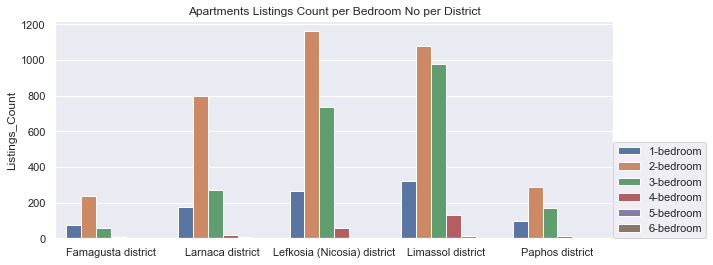

In [37]:
plt.figure(figsize=(10,4))
#Plot that shows the number of listings per bedroom No per District
sns.barplot(x="District", y="Listings_Count", hue="Bedrooms_No", data=District_Listings, ci=None); plt.title('Apartments Listings Count per Bedroom No per District');plt.xlabel(None)

# Move the legend to the far right
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)


The plot above shows the number of Apartment listings for each district and is broken down by the number of bedrooms.
- As it can be seen, the majority of the listings are between 1 - 3 bedrooms across all districts.
- 2-bedroom apartment listings are the most in all districts.

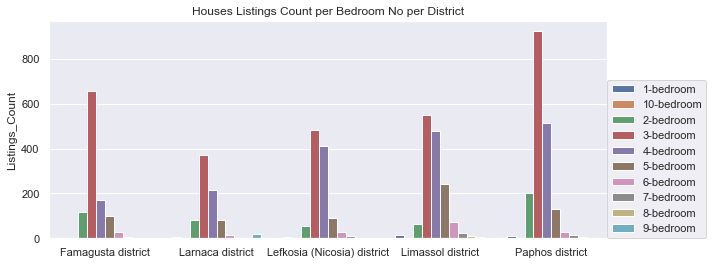

In [38]:
plt.figure(figsize=(10,4))
#Plot that shows the number of listings per bedroom No per District
sns.barplot(x="District", y="Listings_Count", hue="Bedrooms_No", data=District_Listings_H, ci=None); plt.title('Houses Listings Count per Bedroom No per District');plt.xlabel(None) 

# Move the legend to the far right
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)


The plot above shows the number of House listings for each district and is broken down by the number of bedrooms.
- Most of the listings are between 2 - 5 bedrooms across all districts.
- 3-bedroom house listings are the most across all districts followed by 4-bedroom.

Having this, now we are going to calculate the average price for each district per bedroom number.

In [39]:
#Dataset for calculating the average price per districr per bedroom no
BedroomPrices = Apartments[['Bedrooms_No','District','Price']]
#--------------------------------------------------------------------------------------------------------
BedroomPrices_H = Houses[['Bedrooms_No','District','Price']]


In [40]:
#Average price calculation per District per Number of Bedrooms
Average_Price = round((District_Listings.merge(BedroomPrices, left_on=['District','Bedrooms_No'], right_on=['District','Bedrooms_No'])
         .groupby(['District','Bedrooms_No'], as_index=False)['Price']
         .mean()))

In [41]:
Average_Price_H = round((District_Listings_H.merge(BedroomPrices_H, left_on=['District','Bedrooms_No'], right_on=['District','Bedrooms_No'])
         .groupby(['District','Bedrooms_No'], as_index=False)['Price']
         .mean()))

In [42]:
#Renaming columns
Average_Price.rename(columns = {'Price':'Average_Price'}, inplace = True)
#--------------------------------------------------------------------------------------------------------
Average_Price_H.rename(columns = {'Price':'Average_Price'}, inplace = True)

In [43]:
#Adding the average price to the dataframe 
District_Listings = District_Listings.merge(Average_Price,on=['District','Bedrooms_No'],how='inner') 
#--------------------------------------------------------------------------------------------------------
District_Listings_H = District_Listings_H.merge(Average_Price_H,on=['District','Bedrooms_No'],how='inner') 


**Listings Count and Average prices per Bedroom No per District Plots**

Now that the average price is calculated we are going to create two plots, the first one will be the number of listings and the second one the average price, both plots will be based on district and bedroom number. The plots will be based on the top four listings for example, the apartments plot is based on 1-4 bedrooms since the majority of the listings occur within that range, and similarly the houses plot is based on 2-5 bedrooms as shown in the graphs above.     

In [44]:
#Apartments

#Creating a dataset that is based for 1-4 bedrooms
One_To_Four_Beds = District_Listings.loc[(District_Listings.Bedrooms_No == '1-bedroom') | (District_Listings.Bedrooms_No == '2-bedroom') | (District_Listings.Bedrooms_No == '3-bedroom') | (District_Listings.Bedrooms_No == '4-bedroom')].sort_values(["Bedrooms_No"],ascending=[True])
One_To_Four_Beds.sort_values(["District",'Bedrooms_No'],ascending=[True,True]).reset_index(drop=True)

,District,Bedrooms_No,Listings_Count,Average_Price
0,Famagusta district,1-bedroom,72,126997.0
1,Famagusta district,2-bedroom,235,232743.0
2,Famagusta district,3-bedroom,59,497468.0
3,Famagusta district,4-bedroom,6,1116667.0
4,Larnaca district,1-bedroom,176,171153.0
5,Larnaca district,2-bedroom,799,243078.0
6,Larnaca district,3-bedroom,268,464236.0
7,Larnaca district,4-bedroom,20,985475.0
8,Lefkosia (Nicosia) district,1-bedroom,265,136180.0
9,Lefkosia (Nicosia) district,2-bedroom,1162,212029.0


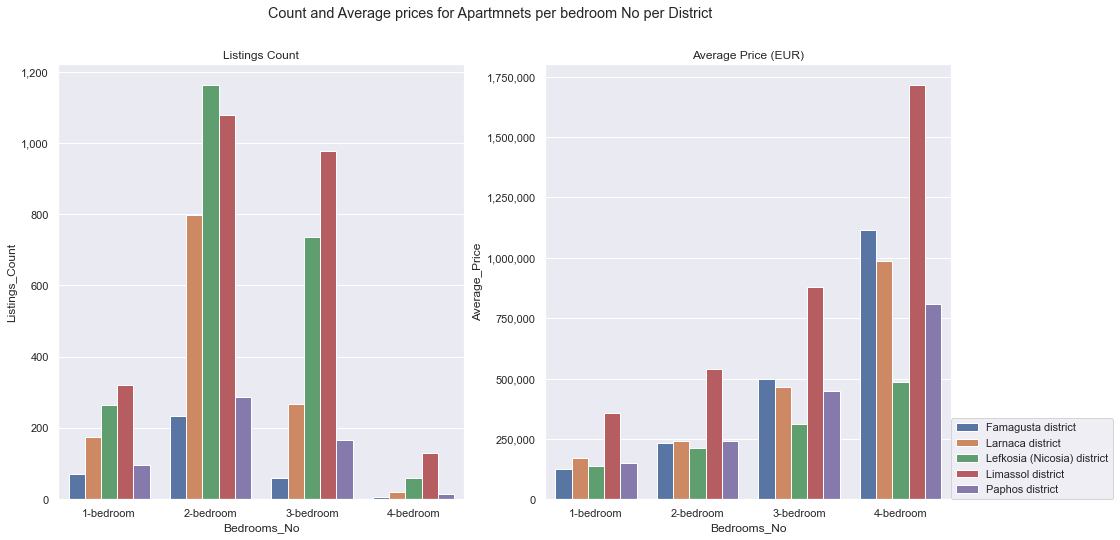

In [45]:
#Plots two graphs in one figure they have different axes and the scientific format is removed
figure, ax = plt.subplots(1, 2,  figsize=(16,8)) 
figure.suptitle('Count and Average prices for Apartmnets per bedroom No per District')
sns.barplot(x="Bedrooms_No", y="Listings_Count", hue="District", data=One_To_Four_Beds, ci=None, ax=ax[0]);ax[0].set_title('Listings Count')
sns.barplot(x="Bedrooms_No", y="Average_Price", hue="District", data=One_To_Four_Beds, ci=None, ax=ax[1]);ax[1].set_title('Average Price (EUR)')

# Format the tick labels for the first subplot
ax[0].set_yticklabels([f"{y:,.0f}" for y in ax[0].get_yticks()])
ax[1].set_yticklabels([f"{y:,.0f}" for y in ax[1].get_yticks()])

#Removing the Legend from first plot
ax[0].legend_.remove()

# Move the legend to the far right
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)


- Based on the plots above we see that Limassol has the highest average prices for apartments across all bedroom numbers.
- What is interesting is that 1-bedroom apartments in Limassol have an average of more than 250,000 EUR and are more expensive than 2-bedroom apartments in other districts as their average price is less than 250,000 EUR.
- Moreover, a 2-bedroom apartment in Limassol has an average price of more than 500,000 EUR and is more expensive than a 3-bedroom apartment in other districts as the average price is less than than 500,000 EUR.
- Limassol, Nicosia, and Larnaca districts have the higher number of listings.
- Despite being the capital Nicosia has the lowest average prices across all bedroom numbers.

In [46]:
#Houses

#Creating a dataset that is based for 2-5 bedrooms
Two_To_Six_Beds_H = District_Listings_H.loc[(District_Listings_H.Bedrooms_No == '2-bedroom') | (District_Listings_H.Bedrooms_No == '3-bedroom') | (District_Listings_H.Bedrooms_No == '4-bedroom') | (District_Listings_H.Bedrooms_No == '5-bedroom')].sort_values(["Bedrooms_No"],ascending=[True])
Two_To_Six_Beds_H.sort_values(["District",'Bedrooms_No'],ascending=[True,True]).reset_index(drop=True)

,District,Bedrooms_No,Listings_Count,Average_Price
0,Famagusta district,2-bedroom,115,261354.0
1,Famagusta district,3-bedroom,658,481336.0
2,Famagusta district,4-bedroom,169,899334.0
3,Famagusta district,5-bedroom,97,1976360.0
4,Larnaca district,2-bedroom,83,211064.0
5,Larnaca district,3-bedroom,369,377947.0
6,Larnaca district,4-bedroom,216,672648.0
7,Larnaca district,5-bedroom,81,1209432.0
8,Lefkosia (Nicosia) district,2-bedroom,55,200755.0
9,Lefkosia (Nicosia) district,3-bedroom,481,352264.0


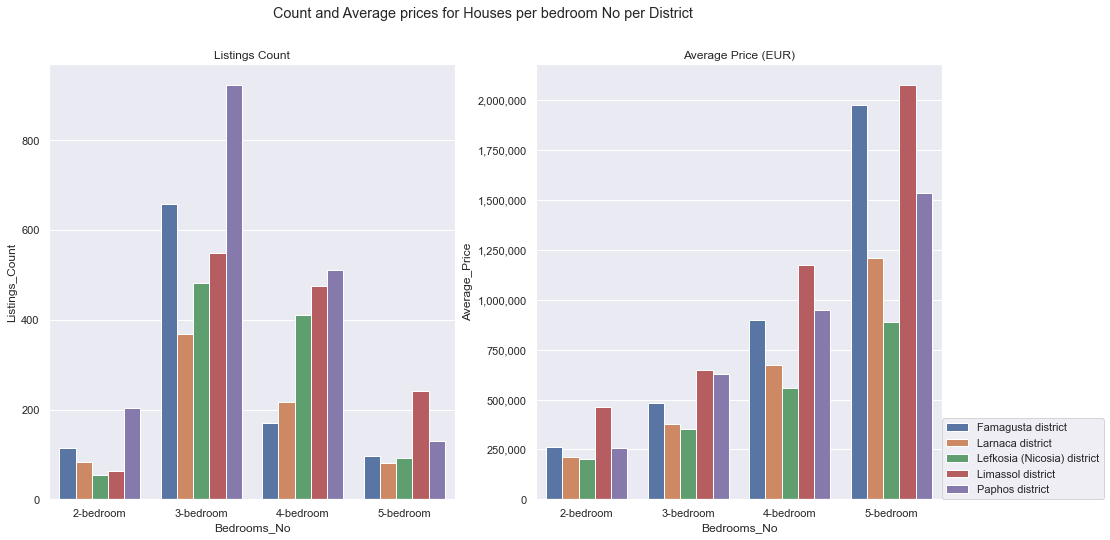

In [47]:
#Plots two graphs in one figure they have different axes and the scientific format is removed
figure, ax = plt.subplots(1, 2,  figsize=(16,8)) 
figure.suptitle(' Count and Average prices for Houses per bedroom No per District')
sns.barplot(x="Bedrooms_No", y="Listings_Count", hue="District", data=Two_To_Six_Beds_H, ci=None, ax=ax[0]);ax[0].set_title('Listings Count')
sns.barplot(x="Bedrooms_No", y="Average_Price", hue="District", data=Two_To_Six_Beds_H, ci=None, ax=ax[1]);ax[1].set_title('Average Price (EUR)')

# Format the tick labels for the first subplot
ax[0].set_yticklabels([f"{y:,.0f}" for y in ax[0].get_yticks()])
ax[1].set_yticklabels([f"{y:,.0f}" for y in ax[1].get_yticks()])

#Removing the Legend from first plot
ax[0].legend_.remove()

# Move the legend to the far right
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)

- Based on the plots above we see that Limassol has the highest average prices for houses across all bedroom numbers.
- Paphos has the most listings between 2-4 bedroom houses. 
- In Paphos average prices are second highest for 3 to 4 bedroom houses as it is more than 500,000 EUR and 700,000 EUR respectively.
- Famagusta has also quite high average prices across all bedroom categories.
- Nicosia has the lowest average house prices across all categories, possible reasons for that are:
    - By assuming that a house by the beach is generally more expensive than a house at the center of the island. Nicosia is the only district that has the smallest coastline, the other districts cover the majority of the island's coastlines.
    - The housing development in Nicosia is more focused at the center of the district. 

**Comparison Plots**

Below we created 4 comparison plots in order to compare the house and apartment prices.  

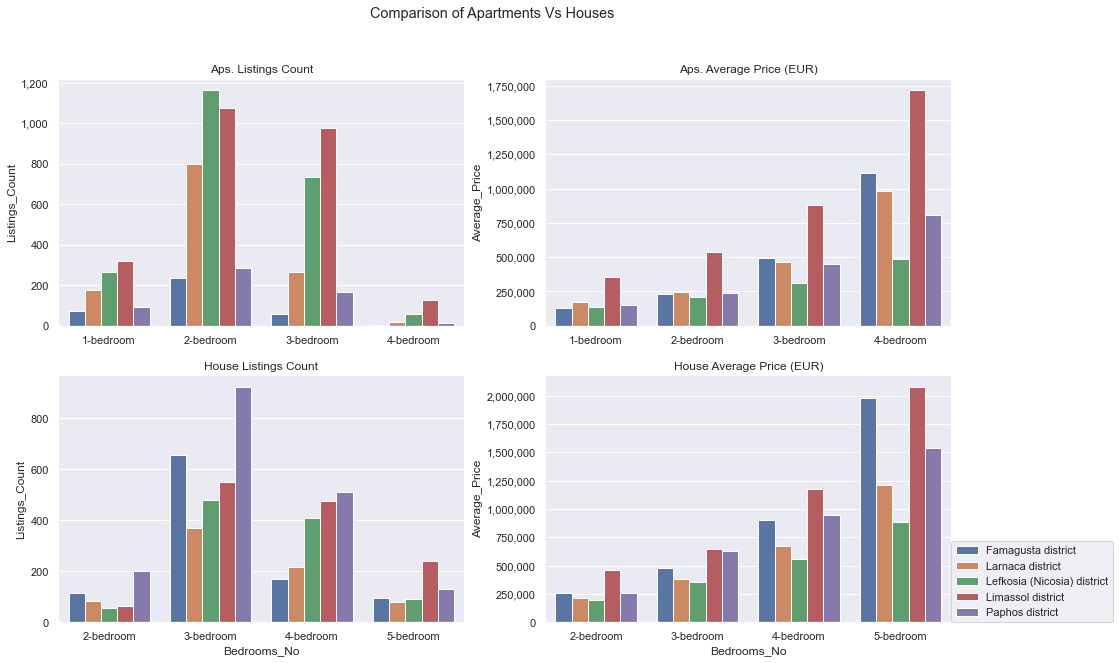

In [48]:
#Comparison

#Plots two graphs in one figure they have different axes and the scientific format is removed
figure, ax = plt.subplots(2, 2,  figsize=(16,10)) ; plt.ticklabel_format(style='plain', axis='y') 
figure.suptitle(' Comparison of Apartments Vs Houses')
sns.barplot(x="Bedrooms_No", y="Listings_Count", hue="District", data=One_To_Four_Beds, ci=None, ax=ax[0][0]);ax[0][0].set_title('Aps. Listings Count')
sns.barplot(x="Bedrooms_No", y="Average_Price", hue="District", data=One_To_Four_Beds, ci=None, ax=ax[0][1]);ax[0][1].set_title('Aps. Average Price (EUR)')
sns.barplot(x="Bedrooms_No", y="Listings_Count", hue="District", data=Two_To_Six_Beds_H, ci=None, ax=ax[1][0]);ax[1][0].set_title('House Listings Count')
sns.barplot(x="Bedrooms_No", y="Average_Price", hue="District", data=Two_To_Six_Beds_H, ci=None, ax=ax[1][1]);ax[1][1].set_title('House Average Price (EUR)')

# Format the tick labels for the first subplot
ax[0][0].set_yticklabels([f"{y:,.0f}" for y in ax[0][0].get_yticks()])
ax[0][1].set_yticklabels([f"{y:,.0f}" for y in ax[0][1].get_yticks()])
ax[1][0].set_yticklabels([f"{y:,.0f}" for y in ax[1][0].get_yticks()])
ax[1][1].set_yticklabels([f"{y:,.0f}" for y in ax[1][1].get_yticks()])

# remove axis labels
ax[0][0].set_xlabel('')
ax[0][1].set_xlabel('')

#Removing the Legend from first plot
ax[0][0].legend_.remove()
ax[0][1].legend_.remove()
ax[1][0].legend_.remove()

# Move the legend to the far right
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', borderaxespad=0.)

- 2-bedroom comparison:
    - Limassol apartments with an average price of more than 500,000 EUR are twice more expensive than the price of houses across the other districts which is close to 250,000 EUR.
- 3-bedroom comparison:
    - Limassol apartments with an average price of more than 750,000 EUR are more expensive than houses across other districts with their average price being below 750,000 EUR.
    - In Famagusta there is not much difference between houses and apartments, both are slightly below 500,000 EUR.
    - In Larnaca, apartments have an average price close to 450,000 EUR hence they are more expensive than houses which have an average price close to 350,000 EUR.
    - In Paphos, houses have an average price close to 630,000 EUR which makes them more expensive than apartments which have an average price close to 450,000 EUR. 
- As mentioned earlier despite being the capital, Nicosia has the lowest average prices across all bedroom categories for both apartments and houses.
- A 1-bedroom apartment in Limassol with an average price exceeding 250,000 EUR costs more than a 2-bedroom house in other districts with an average price below or close to 250,000 EUR. 